# DECISION TREE AND RANDOM FOREST 

we will be exploring publicly available data from LendingClub.com.
    Lending club connects people who need money (borrowers) with people who have money (investors).Hopefully,as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loan_data=pd.read_csv(r'C:\Users\DELL LATITUDE E7440\Desktop\python 3\loan_data.csv')

In [6]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
loan_data.duplicated().sum()

0

In [12]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [15]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

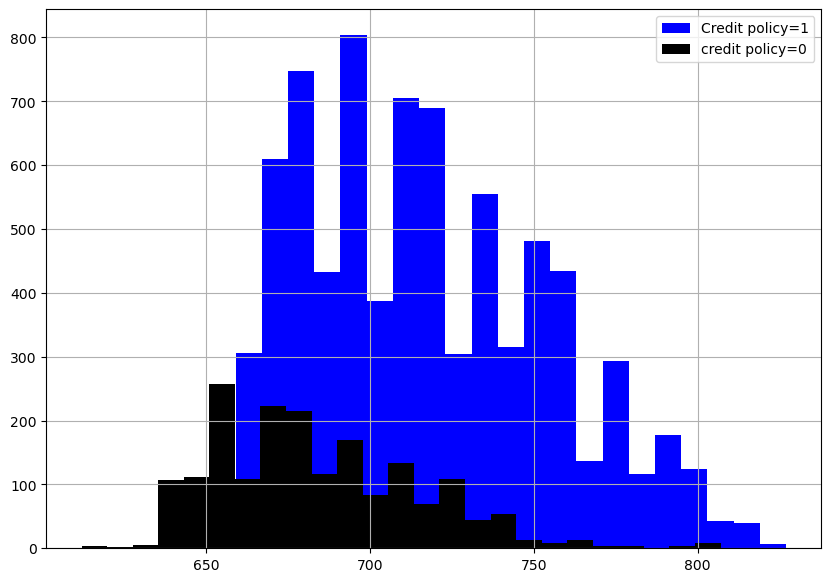

In [18]:
plt.figure(figsize=(10,7))
loan_data[loan_data['credit.policy']==1]['fico'].hist(bins=25,color='blue',label='Credit policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(bins=25,color='black',label='credit policy=0')
plt.legend()

Histogram of the FICO column by credit policy and we could deduce from this histogram that there's a high amountof people eligible for the loan

Text(0.5, 0, 'FICO')

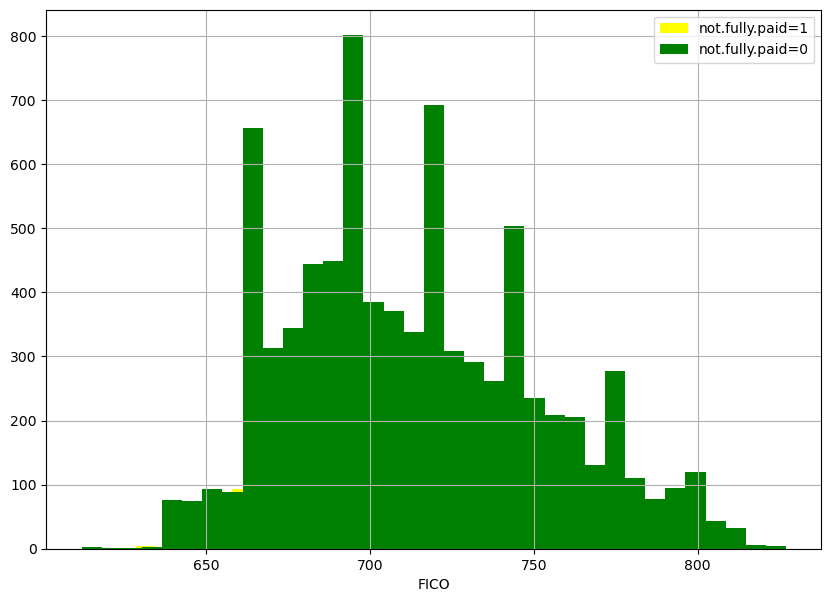

In [24]:
plt.figure(figsize=(10,7))
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(bins=35,color='yellow',label='not.fully.paid=1')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(bins=35,color='green',label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

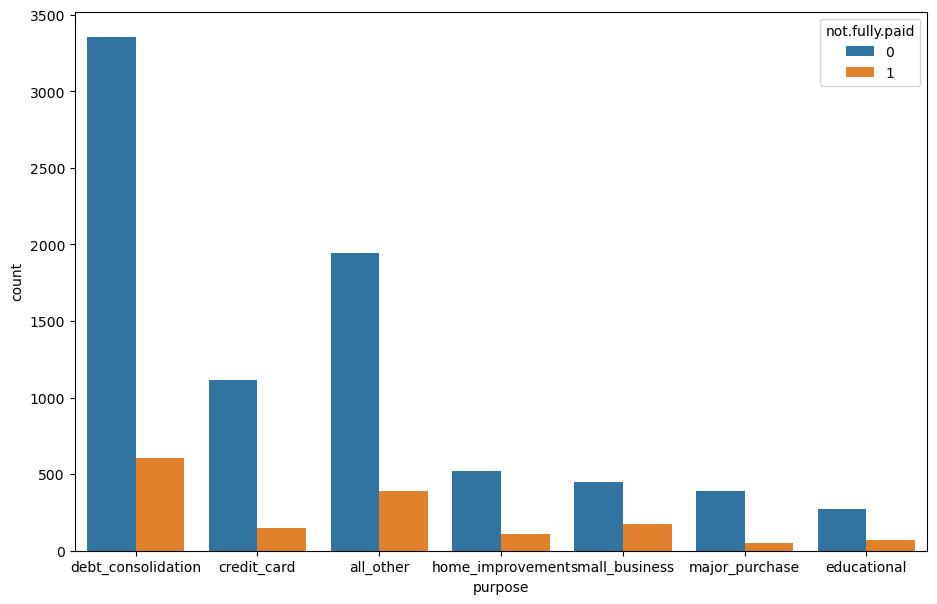

In [28]:
plt.figure(figsize=(11,7))
sns.countplot(data=loan_data,x='purpose',hue='not.fully.paid')

We could see from this countplot that debt_consolidation has the highest amount of involvement and the ratio of not fully paid to the other is quite the same through the  sections.

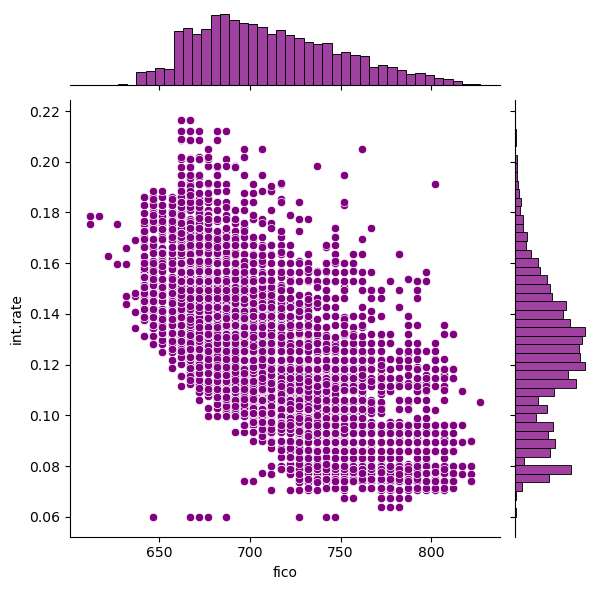

In [32]:
sns.jointplot(data=loan_data,x='fico',y='int.rate',color='purple')

As your FICO score increases it means you have better credit.So your intrest rate on your loans is probably going to go lower and vice versa as your FICO score goes down you have worse credit or interest rate you're going to pay off that loan.

C:\Users\DELL LATITUDE E7440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1100x700 with 0 Axes>

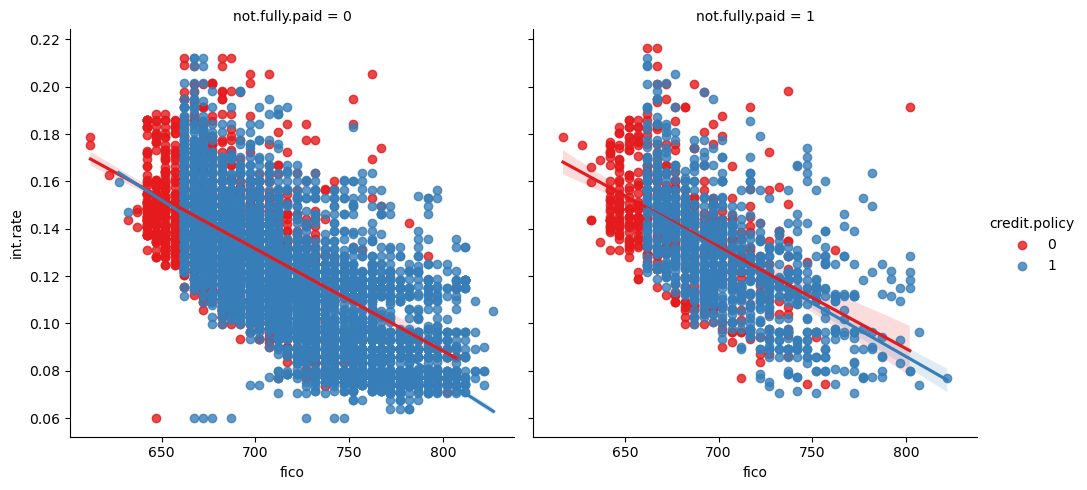

In [35]:
plt.figure(figsize=(11,7))
sns.lmplot(data=loan_data,x='fico',y='int.rate',hue='credit.policy',
          col='not.fully.paid',palette='Set1')

So here we have the columns representing the not fully paid value and the coloring representing the credit policy and we can see here that the behavior is relatively the same whether or not it was fully paid off or on and whether or not they were denied the credit policy.

# Setting up the Data

In [37]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Categorical Features

In [41]:
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [43]:
cat_feat=['purpose']

In [45]:
final_data=pd.get_dummies(loan_data,columns=cat_feat,drop_first=True)

In [47]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Training and Testing the Data Set

In [49]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
x.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
d3=DecisionTreeClassifier()


In [59]:
d3.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [61]:
prediction=d3.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,prediction))

print('\n')

print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1997  434]
 [ 341  102]]


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(n_estimators=400)

In [71]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

# Predictions and Evaluation 

In [73]:
predictions=rfc.predict(x_test)

In [75]:
print(classification_report(y_test,predictions))



print('\n')


print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



[[2423    8]
 [ 435    8]]


From our predictions and Evaluation we could conclude that the Random Forest gave us a better model.